In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


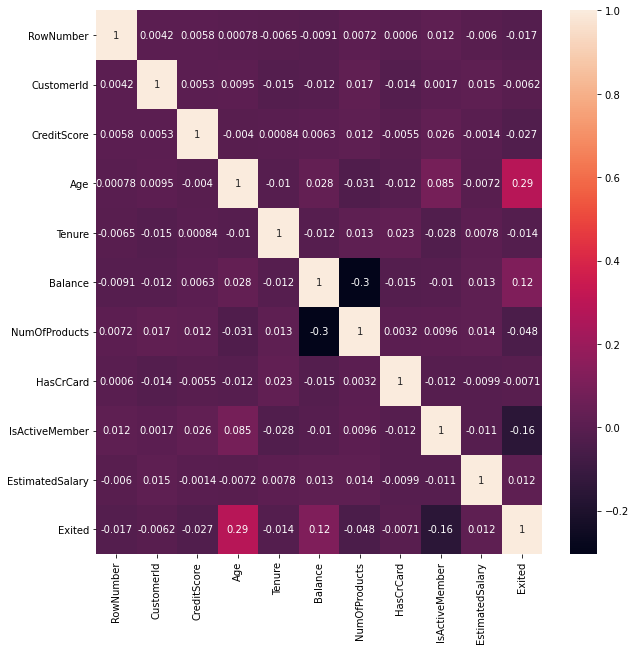

In [5]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index

plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [7]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [8]:
geography=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [12]:
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
X=pd.concat([gender,geography,X],axis=1)

In [15]:
X.head()

,Male,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10


In [18]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [16]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [17]:
classifier=xgboost.XGBClassifier()

In [19]:
randomcv=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,cv=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [20]:
randomcv.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [21]:
randomcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
randomcv.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [23]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
               monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [ ]:
classifier.fit(X,y)

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)
score

array([0.871, 0.865, 0.869, 0.869, 0.855, 0.856, 0.866, 0.873, 0.861,
       0.856])

In [25]:
score.mean()

0.8641